<a href="https://colab.research.google.com/github/eovallemagallanes/Digital-Image-Processing/blob/main/lecture07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Color space

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors


%matplotlib inline

In [ ]:
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
from skimage.transform import rescale, resize, downscale_local_mean

In [ ]:
def channelSplit(image):
    return np.dsplit(image,image.shape[-1])

In [ ]:
def pixColors(img):
    pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()

    return pixel_colors

In [ ]:
d_color_space = {'RGB' : ['Red', 'Green', 'Blue'],
                 'HSV': ['Hue', 'Saturation', 'Value']}

In [ ]:
def colorSpaceViz(img, pixel_colors, color_space):
    [a, b, c] = channelSplit(img)
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    axis.scatter(a.flatten(), b.flatten(), c.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel(d_color_space[color_space][0])
    axis.set_ylabel(d_color_space[color_space][1])
    axis.set_zlabel(d_color_space[color_space][2])
    plt.show()

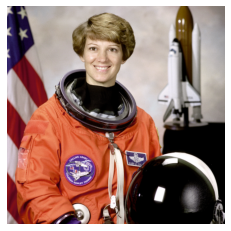

In [ ]:
img = skimage.img_as_float(skid.astronaut())*255.0
plt.imshow(np.uint8(img))
plt.axis('off')
plt.show()

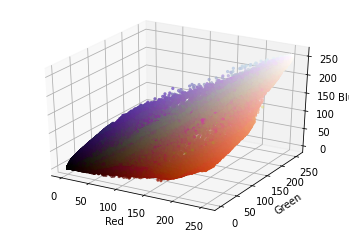

In [ ]:
pixel_colors = pixColors(img)
colorSpaceViz(img, pixel_colors, 'RGB')

## HSV Color Space

![picture](https://drive.google.com/uc?id=1wF1yO8YEziPC7yVV9Ug3mSexCQleUKEu)



In [ ]:
# HSV: Hue, Saturation, Value
# H: position in the spectrum
# S: color saturation ("purity")
# V: color brightness

def rgb_to_hsv(img):
    out = np.empty_like(img)

    # -- V channel
    out_v = img.max(-1)

    # -- S channel
    # Range of values (maximum - minimum) along an axis.
    delta = img.ptp(-1)
    # Ignore warning for zero divided by zero
    old_settings = np.seterr(invalid='ignore')
    out_s = delta / out_v
    out_s[delta == 0.] = 0.

    # -- H channel
    # red is max
    idx = (img[..., 0] == out_v)
    out[idx, 0] = (img[idx, 1] - img[idx, 2]) / delta[idx]

    # green is max
    idx = (img[..., 1] == out_v)
    out[idx, 0] = 2. + (img[idx, 2] - img[idx, 0]) / delta[idx]

    # blue is max
    idx = (img[..., 2] == out_v)
    out[idx, 0] = 4. + (img[idx, 0] - img[idx, 1]) / delta[idx]
    out_h = (out[..., 0] / 6.) % 1.
    out_h[delta == 0.] = 0.

    np.seterr(**old_settings)

    # -- output
    out[..., 0] = out_h
    out[..., 1] = out_s
    out[..., 2] = out_v

    # # remove NaN
    out[np.isnan(out)] = 0

    return out

In [ ]:
img_hsv = rgb_to_hsv(img)

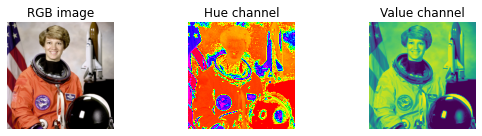

In [ ]:
hue_img = img_hsv[:, :, 0]
value_img = img_hsv[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(np.uint8(img))
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

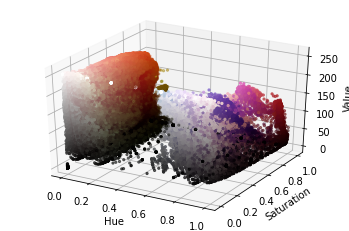

In [ ]:
colorSpaceViz(img_hsv, pixel_colors, 'HSV')

In [ ]:
def hsv_to_rgb(img):
    hi = np.floor(img[..., 0] * 6)
    f = img[..., 0] * 6 - hi
    p = img[..., 2] * (1 - img[..., 1])
    q = img[..., 2] * (1 - f * img[..., 1])
    t = img[..., 2] * (1 - (1 - f) * img[..., 1])
    v = img[..., 2]

    hi = np.stack([hi, hi, hi], axis=-1).astype(np.uint8) % 6
    out = np.choose(
        hi, np.stack([np.stack((v, t, p), axis=-1),
                      np.stack((q, v, p), axis=-1),
                      np.stack((p, v, t), axis=-1),
                      np.stack((p, q, v), axis=-1),
                      np.stack((t, p, v), axis=-1),
                      np.stack((v, p, q), axis=-1)]))

    return out

In [ ]:
img_rgb = hsv_to_rgb(img_hsv)

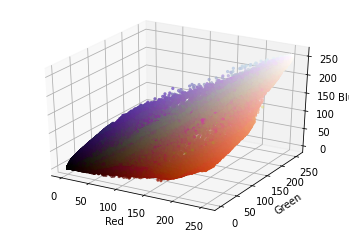

In [ ]:
colorSpaceViz(img_rgb, pixel_colors, 'RGB')